<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Introduction to Linear Regression
    </h1></td>
    <td width="30%">
    <div style="text-align: right">
    <b> Practical Data Science Lessons</b><br><br>
    <b> Riccardo Bertoglio</b><br>
    <a href="mailto:riccardo.bertoglio@polimi.it">riccardo.bertoglio@polimi.it</a><br>
    </div>
</tr>
</table>

## Learning outcomes 🔎


*   What is Linear Regression?
*   Why to use Linear Regression?
*   How to use Linear Regression?
*   Linear Regression Equations
*   Linear Regression with Scikit-Learn
*   Least Squares Method
*   Model Building
*   Model Evaluation
    * Train-Validation-Test split
*   Linear Regression Assumptions
*   Considerations of Multiple Linear Regression
    * Overfitting
    * Multicollinearity
*   Polynomial Regression
*   Regularization Techniques
*   Model Selection 
    * Cross-validation
*   Hypothesis Testing

#### Resources:
* **Theory:**
    *   *[An Introduction to Statistical Learning](https://www.statlearning.com/)*
    *   *[Course notes for STAT 501: Regression Methods by Penn State's Department of Statistics](https://online.stat.psu.edu/stat501/)*
    *   *[Everything you need to Know about Linear Regression!](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/#h-hypothesis-in-linear-regression)*
    *   *[3 Reasons Why You Should Use Linear Regression Models Instead of Neural Networks](https://towardsdatascience.com/3-reasons-why-you-should-use-linear-regression-models-instead-of-neural-networks-16820319d644)*
* **Practice:**
    *   *[scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)*
    *   *[Harvard 2021 CS109-A: Introduction to Data Science](https://harvard-iacs.github.io/2021-CS109A/)*

## What is Linear Regression?

Linear regression is a **supervised learning** algorithm used to predict a quantitative target (or dependent) variable. Even if it is a dull approach compared to newer techniques, it still remains a valid method in many cases. Moreover, many fancy approaches are just an extension of the basic linear regression. Thus, it is important to grasp each detail of it. **Using the best fitting line, it establishes a relationship between the dependent variable $y$ and one or more independent variables $x$**. It works on the principle of **ordinary least squares (OLS)**. In statistics, OLS is a method to estimate unknown parameters of a linear regression function; its goal is to **minimize the sum of square differences between observed dependent variables in the given data set and those predicted by the linear regression function**.

## Why to use Linear Regression? 
- Simple and efficient model
- Provides an interpretable description of how the inputs affect the output (for inference)
- For prediction purposes they can sometimes outperform fancier nonlinear models, especially in situations with small numbers of training cases, low signal-to-noise ratio or sparse data
- Easier to communicate and explain
- Regression analysis will give you a better understanding of statistical inference overall

Indeed, it is currently the most adopted model by data scientists world-wide ([from Kaggle annual survey](https://www.kaggle.com/kaggle-survey-2022))

<img src="fig/top_12_ml_algo_2022.JPG" width="600" height="800">


[Image source](https://www.kaggle.com/code/eraikako/data-science-and-mlops-landscape-in-industry#Overview-of-the-enterprise-AI-technology-stack)

## How to use Linear Regression?

Linear regression (like many other Machine Learning / Statistics models) can be used for inference or prediction.
[From this StackExchange answer we understand that:](https://stats.stackexchange.com/a/244021/253229)

- **Inference**: Given a set of data you want to infer how the output is generated as a function of the data.
- **Prediction**: Given a new measurement, you want to use an existing data set to build a model that reliably chooses the correct identifier from a set of outcomes.
---
- **Inference**: You want to find out what the effect of _Age_, _Passenger Class_ and, _Gender_ has on surviving the Titanic Disaster. You can put up a logistic regression and infer the effect each passenger characteristic has on survival rates.
- **Prediction**: Given some information on a Titanic passenger, you want to choose from the set _{lives,dies}_ and be correct as often as possible. (See bias-variance tradeoff for prediction in case you wonder how to be correct as often as possible.)

Prediction doesn't revolve around establishing the most accurate relation between the input and the output, accurate prediction cares about putting new observations into the right class as often as possible.

So the 'practical example' crudely boils down to the following difference: given a set of passenger data for a single passenger the inference approach gives you a probability of surviving, the classifier gives you a choice between lives or dies.

Tuning classifiers is a very interesting and crucial topic in the same way that correctly interpreting p-values and confidence intervals is.


## Linear Regression Equations

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote the dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscript $\mathbf{i}$ in the notation is simply the index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can be used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So, the hypothesis function is represented as 

$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis. This is the equation for **Simple (or Univariate) Linear regression**. 

In **Multiple Linear regression**, we have more than one independent variable, and we use $\mathbf{x_{ij}}$ to denote the independent variable and $\mathbf{y_{i}}$ to denote dependent variables. If we have $\mathbf{n}$ independent variables, then $\mathbf{j=1,2,3,...,n}$. The hypothesis function is represented as:

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ... + \theta_j x_{ij} + ... + \theta_n  x_{in} }$$
$\mathbf{\theta_0,\theta_1,...,\theta_j,...,\theta_n}$ are the parameters of the hypothesis,
$\mathbf{m}$ the Number of training examples,
$\mathbf{n}$ the number of independent variables,
$\mathbf{x_{ij}}$ is the $\mathbf{i^{th}}$ training example of the $\mathbf{j^{th}}$ feature.

## Linear Regression with Scikit-Learn

**Scikit-learn is one of the most comprehensive machine learning frameworks available in Python**. It provides efficient implementations of many algorithms, is well-documented, and provides a clean and uniform API.

A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

### Data Format

**Scikit-Learn is based on Numpy arrays, and it also supports Pandas DataFrames**.
We usually interact with the Scikit-Learn API using two distinct matrices:

- **Feature matrix**: It contains all the samples in our training set, and, for each sample, it specifies all its features (i.e., its attributes). It is usually referred to as ``X`` in Scikit-Learn functions, and it is assumed to be of shape ``[n_samples, n_features]``. That is, rows represent samples, whereas columns the different features.

- **Target array**: In supervised tasks, an additional, distinct array is required to specify the target value we want to learn. It is usually called ``y`` and it must have shape ``[n_samples, n_targets]`` (typically ``[n_samples, 1]`` or even ``[n_samples]``)

### Scikit-learn API

Almost all the Scikit-Learn predictor objects share the same API. However, based on the type of predictor (e.g., supervised vs unsupervised), some methods or attributes may not be implemented or used.

In general, we interact with the API with the following steps:

- **Model selection**: we choose a particular model, i.e., we import its class from Scikit-Learn
- **Hyperparameter selection**: we choose the parameters (e.g., number of clusters, the K parameter in KNN) creating a particular instance of the predictor
- **Data processing**: we arrange data into a feature matrix ``X`` and a set of target values ``y``, eventually splitting the dataset into training, validation, and test sets
- **Model fitting**: we train the model by calling the ``estimator.fit(X, y)`` method
- **Test/prediction on new data**: we apply the model on test samples to validate its performance. We generally use the ``estimator.predict(X_test)`` function for that.

### Import Library and Dataset
Now we import a couple of python libraries required for our analysis and import the dataset.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

np.random.seed(0)

The advertising dataset captures sales revenue generated for advertisement spending across multiple channels like radio, tv, and newspaper.

In [2]:
# Read the data and creates a pandas DataFrame
adv_data = pd.read_csv("data/Advertising.csv")

# Print the first few raws of the dataset
adv_data.head()

# Remove the first column (ID)
adv_data = adv_data[['TV', 'Radio', 'Newspaper', 'Sales']]

adv_data.head()
print('\nNumber of rows and columns in the dataset: ', adv_data.shape)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



Number of rows and columns in the dataset:  (200, 4)


Now we have imported the dataset. When we look at the shape of the dataset, it is (200, 4). So there are $\mathbf{m=200}$ training example and $\mathbf{n=4}$ independent variable. The target variable here is Sales, and the remaining three variables, TV, Radio, and Newspaper, are independent variables. There are multiple independent variables, so we need to fit a Multiple Linear Regression. Then the hypothesis function looks like

$$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 TV + \theta_2 Radio + \theta_3 Newspaper }$$

This multiple linear regression equation for the given dataset.  
If $\mathbf{i=1}$ then 
$$\mathbf{h_\theta(x_{1}) = \theta_0+\theta_1 230.1 + \theta_2 37.8 + \theta_3 69.2 }$$ 
$$\mathbf{y_1 = 22.1}$$
If $\mathbf{i=3}$ then $$\mathbf{h_\theta(x_{3}) = \theta_0+\theta_1 17.2 + \theta_2 45.9 + \theta_3 69.3 }$$ 
$$\mathbf{y_3 = 9.3}$$
*Note*: In Python, the index starts from 0.
$$\mathbf{x_1 = \left(\begin{matrix} x_{11} & x_{12} & x_{13}\end{matrix}\right) = \left(\begin{matrix} 230.1 & 37.8 & 69.2\end{matrix}\right) }$$

### Matrix Formulation

In general we can write the above vector as:
$$ \mathbf{x_{ij}} = \left(\begin{smallmatrix} \mathbf{x_{i1}} & \mathbf{x_{i2}} &.&.&.& \mathbf{x_{in}} \end{smallmatrix} \right)$$

Now we combine all available individual vectors into a single matrix  $\mathbf{X}$ of size $(m,n)$, which consists of all training examples:

$$\mathbf{X} = \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}$$

We represent the parameters of the function and the dependent variable in vector form as:

$$\theta = \left (\begin{matrix} \theta_0 \\ \theta_1 \\ .\\.\\ \theta_j\\.\\.\\ \theta_n \end {matrix}\right)_{(n+1,1)} 
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)_{(m,1)}$$

So we represent the hypothesis function in vector form as:
$$\mathbf{ h_\theta{(x)} = X\theta}$$

In [3]:
# Prepare the data
X_features = ['TV', 'Radio', 'Newspaper']
X = adv_data[X_features].to_numpy()  # X.shape = [200, 3]
y = adv_data['Sales'].to_numpy()    # y.shape = [200]
print(X.shape, y.shape)

(200, 3) (200,)


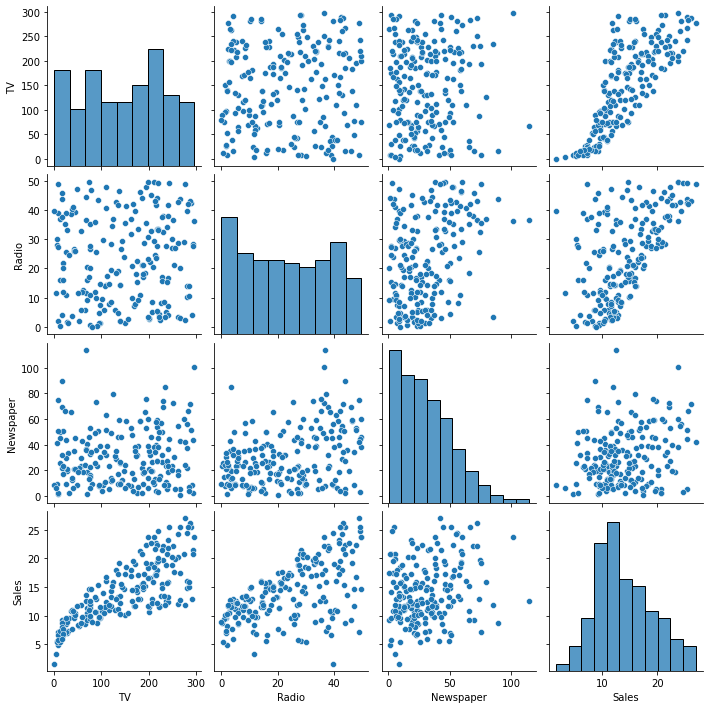

In [4]:
# Plot a pair plot showing each variable vs. every other
# using seaborn pairplot utility
sns.pairplot(adv_data, height=2.5)

## Least Squares Method

### Cost function

A cost function measures how much error the model commits in estimating the relationship between $x$ and $y$. We can measure the accuracy of our hypothesis function by using a cost function. One option is to compute the **average difference between the observed dependent variable values and those predicted by the hypothesis function**.
  
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{J(\theta) =  \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$
To implement the linear regression, take the training example and add an extra column, the $x_0$ feature, where $\mathbf{x_0=1}$. $\mathbf{x_{0}} = \left( \begin{smallmatrix} x_{10} & x_{20} & x_{30} &.&.&.& x_{m0} \end{smallmatrix} \right)$, and the features matrix $\mathbf{X}$ will become:

$$\mathbf{X} = \left( \begin{smallmatrix} x_{10} & x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{20} & x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{30} & x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                 .&.&.&.&. &.&.&.& \\
                                 .&.&.&.&. &.&.&.& \\
                                x_{m0} & x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n+1)}$$  
Each of the m samples is a column vector with n+1 rows and $x_0$ being 1 for our convenience, that is $\mathbf{x_{10},x_{20},x_{30} .... x_{m0} =1}$. Now we rewrite the ordinary least square cost function in matrix form as
$$\mathbf{J(\theta) = \frac{1}{m} (X\theta - y)^T(X\theta - y)}$$

Let's look at the matrix multiplication concept. The multiplication of two matrices happens only if the number of columns of the first matrix equals the number of rows of the second matrix. Here the input matrix $\mathbf{X}$ is of size $\mathbf{(m,n+1)}$, the parameters vector is of size $(n+1,1)$ and the dependent variables vector is of size $\mathbf{(m,1)}$. The product of the matrix $\mathbf{X_{(m,n+1)}\theta_{(n+1,1)}}$ will return a vector of size $\mathbf{(m,1)}$, then the product of $\mathbf{(X\theta - y)^T_{(1,m)}(X\theta - y)_{(m,1)}}$ will return a scalar.

### Normal Equation
The normal equation is an analytical solution to the linear regression problem with the ordinary least square cost function. To minimize our cost function, we take the partial derivative of $\mathbf{J(\theta)}$ with respect to $\theta$ and equate to $0$.
 $$\mathbf{min_{\theta_0,\theta_1..\theta_n} J({\theta_0,\theta_1..\theta_n})}$$
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} =0}$$ 
 where $\mathbf{j = 0,1,2,....n}$
 
 Now we will apply partial derivative of our cost function,
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} = \frac{\partial }{\partial \theta} \frac{1}{m}(X\theta - y)^T(X\theta - y) }$$
 I will throw $\mathbf{\frac {1}{m}}$ part away since we are going to compare a derivative to $0$. And solve $\mathbf{J(\theta)}$,  
 
 $$\mathbf{J(\theta) = (X\theta -y)^T(X\theta - y)}$$
 $$\mathbf{= ((X\theta)^T - y^T)(X\theta -y)}$$   
 $$\mathbf{= (\theta^T X^T - y^T)(X\theta - y)}$$
 $$\mathbf{= \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y}$$
 $$\mathbf{ = \theta^T X^T X \theta  - 2\theta^T X^T y + y^T y}$$

Here $\mathbf{y^T_{(1,m)} X_{(m,n+1)} \theta_{(n+1,1)} = \theta^T_{(1,n+1)} X^T_{(n+1,m)} y_{(m,1)}}$ because unit vector.

$$\mathbf{\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta} (\theta^T X^T X \theta  - 2\theta^T X^T y + y^T y )}$$
$$\mathbf{ = X^T X \frac {\partial \theta^T \theta}{\partial\theta} - 2 X^T y \frac{\partial \theta^T}{\partial\theta} + \frac {\partial y^T y}{\partial\theta}}$$
Partial derivative $\mathbf{\frac {\partial x^2}{\partial x} = 2x}$, $\mathbf{\frac {\partial kx^2}{\partial x} = kx}$,
$\mathbf{\frac {\partial Constact}{\partial x} = 0}$

$$\mathbf{\frac{\partial J(\theta)}{\partial\theta} = X^T X 2\theta - 2X^T y +0}$$
$$\mathbf{ 0 = 2X^T X \theta - 2X^T y}$$
$$\mathbf{ X^T X \theta = X^Ty }$$
$$\mathbf{ \theta = (X^TX)^{-1} X^Ty }$$
this the normal equation for linear regression

## Model building

We now build the regression model, first using the above **$\mathbf{\theta}$ equation and then Scikit-Learn functions**. To verify the accuracy of our model, we need to **predict on a test set**.

### Train-Validation-Test split

When building our models, we usually split the dataset into subsets. This is the general idea: 

1. **Training Set**: Data you have seen. You train different types of models with various different hyper-parameters and regularization parameters on this data.
2. **Validation Set**: Used to compare different models. We use this step to tune our hyper-parameters i.e. find the optimal set of hyper-parameters (such as $k$ for k-NN or our $\beta_i$ values or number of degrees of our polynomial for linear regression). Pick your best model here.
3. **Test Set**: Using the best model from the previous step, simply report the score e.g. $R^2$ score, MSE or any metric that you care about, of that model on your test set. **DON'T TUNE YOUR PARAMETERS HERE!**. Why, I hear you ask? Because we want to know how our model might do on data it hasn't seen before. We don't have access to this data (because it may not exist yet) but the test set, which we haven't seen or touched so far, is a good way to mimic this new data. 

In our case, we just split the dataset into training and test subsets using a specific Scikit-Learn function.

In [5]:
# Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

Now we build the model using our linear regression equation $\mathbf{\theta = (X^T X)^{-1} X^Ty}$. First we need to add the vector $\mathbf{x_0 =1}$ to our original dataset. 

In [6]:
# Step 1: add x_0=1 to the dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step 2: build the model
theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [7]:
# we now create a pandas data frame to compare the the linear regression models parameters

parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intercept'] + list(adv_data[X_features].columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

Now we use the Scikit-Learn module for linear regression

In [8]:
from sklearn.linear_model import LinearRegression 

# Note: there is no need to add x_0=1, sklearn will take care of it when fit_intercept equals True
lin_reg = LinearRegression(fit_intercept=True)   
lin_reg.fit(X_train, y_train)    

# You can inspect the learned parameters by using the 'intercept_' and 'coef_' attributes of the model
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameters = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameters

LinearRegression()

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intercept,3.016008,3.016008
1,theta_1,TV,0.045819,0.045819
2,theta_2,Radio,0.177275,0.177275
3,theta_3,Newspaper,0.000854,0.000854


The parameters obtained from both models are the same. So we successfully built our model using the normal equation and verified the result using the sklearn linear regression module. Let's move ahead. The next step is prediction and model evaluation.

## Model evaluation

### Mean Squared Error (MSE)
We will predict the values of the target variable by using our model parameters on the test dataset. Then we compare the predicted values with the actual values in the test set. We compute the **Mean Squared Error (MSE)** using the formula: 
$$\mathbf{ MSE = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$

### R squared
Another measure to assess the accuracy of our model is the $\mathbf{R^2}$. The $\mathbf{R^2}$ mesures the proportion of variability in the response variable $\mathbf{y}$ that can be explained by the independent variables $\mathbf{X}$. $\mathbf{R^2}$ can have values between -inf to 1. An $\mathbf{R^2}$ value close to 1 indicates that the model explains all the variablity of the response data. The $\mathbf{R^2}$ formula is:

$$\mathbf{R^2 = 1 - \frac{RSS}{TSS}}$$
**RSS = Residual Sum of Squares**  
**TSS = Total Sum of Squares**  
$$\mathbf{RSS = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{TSS = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$
Here $\mathbf{\hat{y}}$ is the predicted value, and $\mathbf{\bar{y}}$ is the mean value of $\mathbf{y}$.

In [9]:
# Normal equation evaluation

y_pred_norm = np.matmul(X_test_0,theta)

# MSE
mse = np.sum((y_pred_norm - y_test)**2) / X_test_0.shape[0]

# R_squared 
rss = np.sum((y_pred_norm - y_test)**2)
tss = np.sum((y_test - y_test.mean())**2)
R_squared = 1 - (rss/tss)
print('The Mean Squared Error (MSE) is: ', mse)
print('R squared obtained from the normal equation method is:', R_squared)

The Mean Squared Error (MSE) is:  2.586337457336085
R squared obtained from the normal equation method is: 0.9266842516167628


In [11]:
# sklearn regression module evaluation

y_pred_sk = lin_reg.predict(X_test)

# MSE
from sklearn.metrics import mean_squared_error
mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_squared
R_squared_sk = lin_reg.score(X_test,y_test)
print('The Mean Squared Error (MSE) is: ', mse_sk)
print('R squared obtained from scikit learn library is :',R_squared_sk)

The Mean Squared Error (MSE) is:  2.5863374573360693
R squared obtained from scikit learn library is : 0.9266842516167633


The model returns a $R^2$ value of about 0.9267. It means that 92.67% of the response variability is captured by the predictors.

### Other regression evaluation metrics
- **Root Mean Squared Error (MSE)**: RMSE is in the same unit as the dependent variable while MSE is in squared units.
$$\mathbf{ RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}}$$
- **Mean Absolute Error (MAE)**: MSE punishes large errors more than MAE does. If you prefer greater interpretability, then MAE would be a better choice.
$$\mathbf{ MAE = \frac{1}{m} \sum_{i=1}^{m}\left\lvert \hat{y}_i - y_i\right\lvert}$$

## Linear Regression Assumptions
Linear regression is probably the most important model in Data Science. Despite its apparent simplicity, it relies however on some key assumptions. Good knowledge of these is crucial to create and improve your model.

The assumptions for Simple Linear Regression models are the following:

#### 1. Linear Relationship
In linear regression the relationship between the dependent and independent variable should be, of course, *linear*. If there is only one predictor, then is pretty easy to test the linearity with a scatter plot of the response on the single predictor. Most cases aren’t so simple, and **in the case of multiple predictors we instead plot the residuals versus the predicted values**. Ideally, the residual plot will show no pattern. **If there is no linear relationship**, you can either **adding polynomial terms to some of the predictors** or **applying nonlinear transformations**. If those do not work, **try adding additional variables** to help capture the relationship between the predictors and the label.

<Figure size 360x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Check for Linearity:\nResiduals vs Predicted values')

Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Residuals')

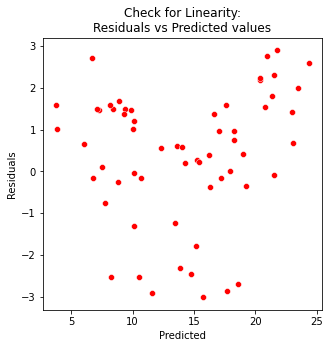

In [13]:
# Check for Linearity

# Compute the residuals on the test set
residuals = y_test - y_pred_sk

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_pred_sk, y=residuals, color='r')
plt.title('Check for Linearity:\nResiduals vs Predicted values')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

In this case we can recognize a U (or V) shape that suggests a non perfectly linear relationship.

#### 2. Normality of the Error Terms
The residuals plot should be *normally* distributed, and the *mean* of *residual errors* should be 0 or close to 0 as much as possible. If it is not the case, you can **try nonlinear transformations of the variables, excluding specific variables (such as long-tailed variables), or removing outliers** may solve this problem.

Text(0.5, 1.0, 'Check for residuals normality & mean:\n Distribution of residuals')

Text(0.5, 6.79999999999999, 'Residuals')

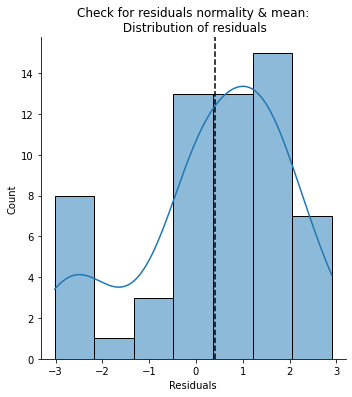

In [14]:
# Check for residuals normality & mean

sns.displot(data=residuals, kind='hist', kde=True)
plt.axvline(residuals.mean(), color='k', linestyle='--')
plt.title('Check for residuals normality & mean:\n Distribution of residuals');
plt.xlabel('Residuals')

In this specific case, the mean of the residuals is close to 0 but they are not prefectly normally distributed.

#### 3. No correlation of the Error Terms (or Independence of Observations)

Autocorrelation occurs when the residuals are not independent from each other. In other words when the value of $y(x+1)$ is not independent from the value of $y(x)$. This **usually occurs in time series** models where the next instant is dependent on previous instant. If the error terms are correlated, **the estimated standard errors tend to underestimate the true standard error**. While **a scatterplot allows you to check for autocorrelations**, you can **test** the linear regression model for autocorrelation **with the Durbin-Watson test**. Durbin-Watson’s $d$ tests the null hypothesis that the residuals are not linearly auto-correlated. While $d$ can assume values between 0 and 4, values around 2 indicate no autocorrelation. As a rule of thumb values of $1.5 < d < 2.5$ show that there is no auto-correlation in the data. However, the Durbin-Watson test only analyses linear autocorrelation and only between direct neighbors, which are first order effects.

In [16]:
from statsmodels.stats.stattools import durbin_watson


print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 1.5 is positive autocorrelation')
print('2.5 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(residuals)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 1.5 is positive autocorrelation
2.5 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.390584235437725
Little to no autocorrelation 

Assumption satisfied


#### 4. Homoscedasticity

**Homoscedasticity in a model means that the error terms have a constant variance**. The best way for checking homoscedasticity is to make a scatterplot with the residuals against the predicted values. Homoscedasticity means a constant error and you are looking for a constant deviation of the points from the zero-line. Heteroscedasticity can be **solved either by using weighted least squares regression** instead of the standard OLS **or transforming either the dependent or highly skewed variables**. Performing **a log transformation on the dependent variable could be a good place to start**.

<Figure size 360x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Check for Homoscedasticity:\nResiduals Vs Predicted values')

Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Residuals')

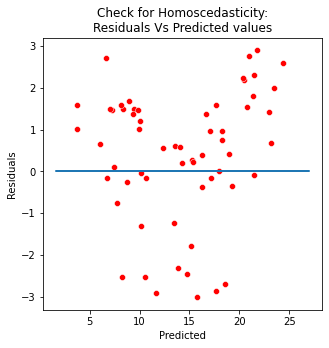

In [15]:
#Check for Homoscedasticity

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_pred_sk, y=residuals, color='r') 
plt.title('Check for Homoscedasticity:\nResiduals Vs Predicted values')
plt.plot(y, [0]*len(y))
plt.xlabel('Predicted')
plt.ylabel('Residuals')

In our case we recognize an heteroscedasticity. The variance of the residuals in the middle of the plot is larger than the variance of the residuals on the sides.

**By looking the above analysis we recognized that there some problems in our dataset. What happens if we remove the Newspaper feature and we add an interaction term between Radio and TV (that is, adding a new 'Radio x TV' term in the model)?**

## Considerations of Multiple Linear Regression

* **Overfitting**: When more and more variables are added to a model, the model may become far too complex and usually ends up memorizing all the data points in the training set. This phenomenon is known as the overfitting of a model. This usually leads to high training accuracy and very low test accuracy.
* **Multicollinearity**: It is the phenomenon where a model with several independent variables may have some variables interrelated.
* **Feature Selection**: With more variables present, selecting the optimal set of predictors from the pool of given features (many of which might be redundant) becomes an important task for building a relevant and better model.


### Overfitting and Underfitting - Bias-Variance tradeoff

There have always been situations where a **model performs well on training data but not on the test data**. While training models on a dataset, overfitting, and underfitting are the most common problems faced by people. 

Before understanding overfitting and underfitting one must know about bias and variance.

#### Bias:

Bias is a measure to determine how accurate is the model likely to be on future unseen data. Complex models, assuming there is enough training data available, can do predictions accurately. Whereas the models that are too naive, are very likely to perform badly with respect to predictions. Simply, **bias is errors made on the training data**. 

Generally, linear algorithms have a high bias which makes them fast to learn and easier to understand but in general, are less flexible. Implying lower predictive performance on complex problems that fail to meet the expected outcomes.

#### Variance:

**Variance is the sensitivity of the model towards training data**, that is it quantifies how much the model will react when input data is changed.

Ideally, the model shouldn’t change too much from one training dataset to the next training data, which will mean that the algorithm is good at picking out the hidden underlying patterns between the inputs and the output variables.

Ideally, a model should have lower variance which means that the model doesn’t change drastically after changing the training data(it is generalizable). Having higher variance will make a model change drastically even on a small change in the training dataset.

#### Bias Variance Tradeoff

![Tree2.gif](fig/Tree2.gif)

[Image source.](https://cs109.org/)



The aim of any supervised machine learning algorithm is to achieve low bias and low variance as it is more robust. So that the algorithm should achieve better performance.

There is **no escape from the relationship between bias and variance** in machine learning. There is an inverse relationship between bias and variance:
- An increase in bias will decrease the variance.
- An increase in the variance will decrease the bias.

There is a trade-off that plays between these two concepts and the algorithms must find a balance between bias and variance.

As a matter of fact, one cannot calculate the real bias and variance error terms because we do not know the actual underlying target function.

Now coming to the overfitting and underfitting.

#### Overfitting

When **a model learns each and every pattern and noise in the data** to such extent that it affects the performance of the model on the unseen future dataset, it is referred to as overfitting. The **model fits the data so well that it interprets noise as patterns in the data**.

When a model has low bias and higher variance it ends up memorizing the data and causing overfitting. **Overfitting causes the model to become specific rather than generic**. This usually leads to high training accuracy and very low test accuracy.

Detecting overfitting is useful, but it doesn’t solve the actual problem. There are several ways to prevent overfitting, which are stated below:
- If the training data is too small to train, add more relevant and clean data
- Data augmentation (data)
- Do some feature selection and remove unnecessary features (data)
- Reduce model complexity:
    - Regularization (learning algorithm)
    - Pruning (model)
    - Early stopping (model)
    - Ensembling (model)

#### Underfitting

Underfitting is not often discussed as often as overfitting is discussed. When the **model fails to learn from the training dataset and is also not able to generalize the test dataset**, is referred to as underfitting. This type of problem can be very easily detected by the performance metrics.

When a model has high bias and low variance it ends up not generalizing the data and causing underfitting. It is unable to find the hidden underlying patterns from the data. This usually leads to low training accuracy and very low test accuracy. The ways to prevent underfitting are stated below:
- Increase the model complexity
- Increase the number of features in the training data
- Check data quality and remove noise from the data


### Multicollinearity

Multicollinearity exists when two or more of the predictors in a regression model are moderately or highly correlated. As multicollinearity makes it difficult to find out which variable is actually contributing towards the prediction of the response variable, **it leads one to conclude incorrectly, the effects of a variable on the target variable**. Though **it does not affect the precision of the predictions**, it is essential to properly detect and deal with the multicollinearity present in the model, as random removal of any of these correlated variables from the model causes the coefficient values to swing wildly and even change signs (**impact on inference**).

Multicollinearity can be detected using the following methods:
- **Pairwise Correlations**: Checking the pairwise correlations between different pairs of independent variables can throw useful insights in detecting multicollinearity.
- **Variance Inflation Factor (VIF)**: Not all collinearity problems can be detected by inspecting the correlation matrix. This happens **when collinearity exist between three or more predictors** even if no pair of them show a particular correlation. In these cases **we examine the *variance inflation factor (VIF)***. The VIF identifies correlation between independent variables and strength of that correlation.  It is **calculated by regressing each independent variable on all the others** and calculating a score as follows: $\mathbf{VIF = \frac {1}{1-R^2}}$. The smallest possible value for VIF is 1, which indicates the absence of collineraity. If VIF exceeds 5 or 10 it means a problematic amount of multicollinearity. The problem can be **solved by removing predictors with a high variance inflation factor (VIF) or performing dimensionality reduction**.

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation of Predictors')

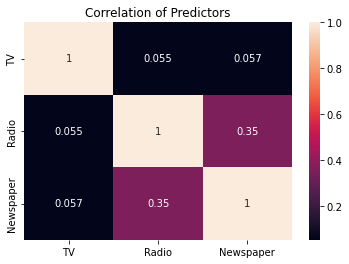

In [12]:
# Plotting the correlation matrix 

sns.heatmap(adv_data[X_features].corr(), annot=True)
plt.title('Correlation of Predictors')

We notice some correlation between the Radio and Newspaper variables.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Gathering the VIF for each variable
VIF = [variance_inflation_factor(adv_data[X_features], i) for i in range(adv_data[X_features].shape[1])]
for idx, vif in enumerate(VIF):
    print('{0}: {1}'.format(X_features[idx], vif))

TV: 2.486771835198193
Radio: 3.285462100162896
Newspaper: 3.0552445106573844


The VIF values are not close to 1 but they do not seem to be problematic (>= 5).

Resources:
- For more details on multicollinearity, [check this lesson.](https://online.stat.psu.edu/stat501/lesson/12)
- [Why multicollinearity does not affect the precision of predictions?](https://stats.stackexchange.com/a/361609/253229)

## Polynomial Regression

One common way to increase the expressive power of linear models is to transform features using nonlinear functions. One option is to construct polynomial features.

In the case of two features, the standard linear regression model fits a plane (i.e., it finds the best plane that describes the data):

$\hat{y} = w_0 + w_1 x_1 + w_2 x_2$

If we combine features in second-order polynomials, we can fit a paraboloid to the data instead on a simple plane.

**Notice: the model is still linear in the parameter!**

$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$

$\hat{y} = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Transform features into polynomial features based on the degree.
# e.g., in case of degree 2 we have the original features plus the product
# of each pair of features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly = poly.fit(X_train)

# Apply the transformation
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# With degree 2 and three features we have: x1,x2,x3,x1x1,x1x2,x1x3,x2x2,x2x3,x3x3
print("X_train.shape", X_train.shape, " X_poly_train.shape", X_train_poly.shape)
print("X_test.shape", X_test.shape, " X_poly_train.shape", X_test_poly.shape)

X_train.shape (140, 3)  X_poly_train.shape (140, 9)
X_test.shape (60, 3)  X_poly_train.shape (60, 9)


**Note:** `PolynomialFeatures` by default has an `include_bias=True` which automatically adds an all-ones column, representing the case in which all features appear with 0 power. In linear models acts as an intercept.

We can either: 
- Add the additional all-ones features (`include_bias=True`) and use a `LinearRegressor(fit_intercept=False)`
- Or remove it (`include_bias=False`) and add it later with `LinearRegressor(fit_intercept=True)`

## Regularization Techniques

Regularization (or shrinkage) is a **model-embedded feature selection technique**. As other feature selection techniques it can increase:
- **Prediction accuracy**: if the number of samples $n$ is not much larger than the number of variables $p$, the least squares estimates will have high variance. By shrinking the coefficients, we can reduce the variance at the cost of a negligible increase of bias
- **Model interpretability**: including irrelevant variables lead to unnecessary complexity. Regularization can shrink the coefficients estimates towards zero

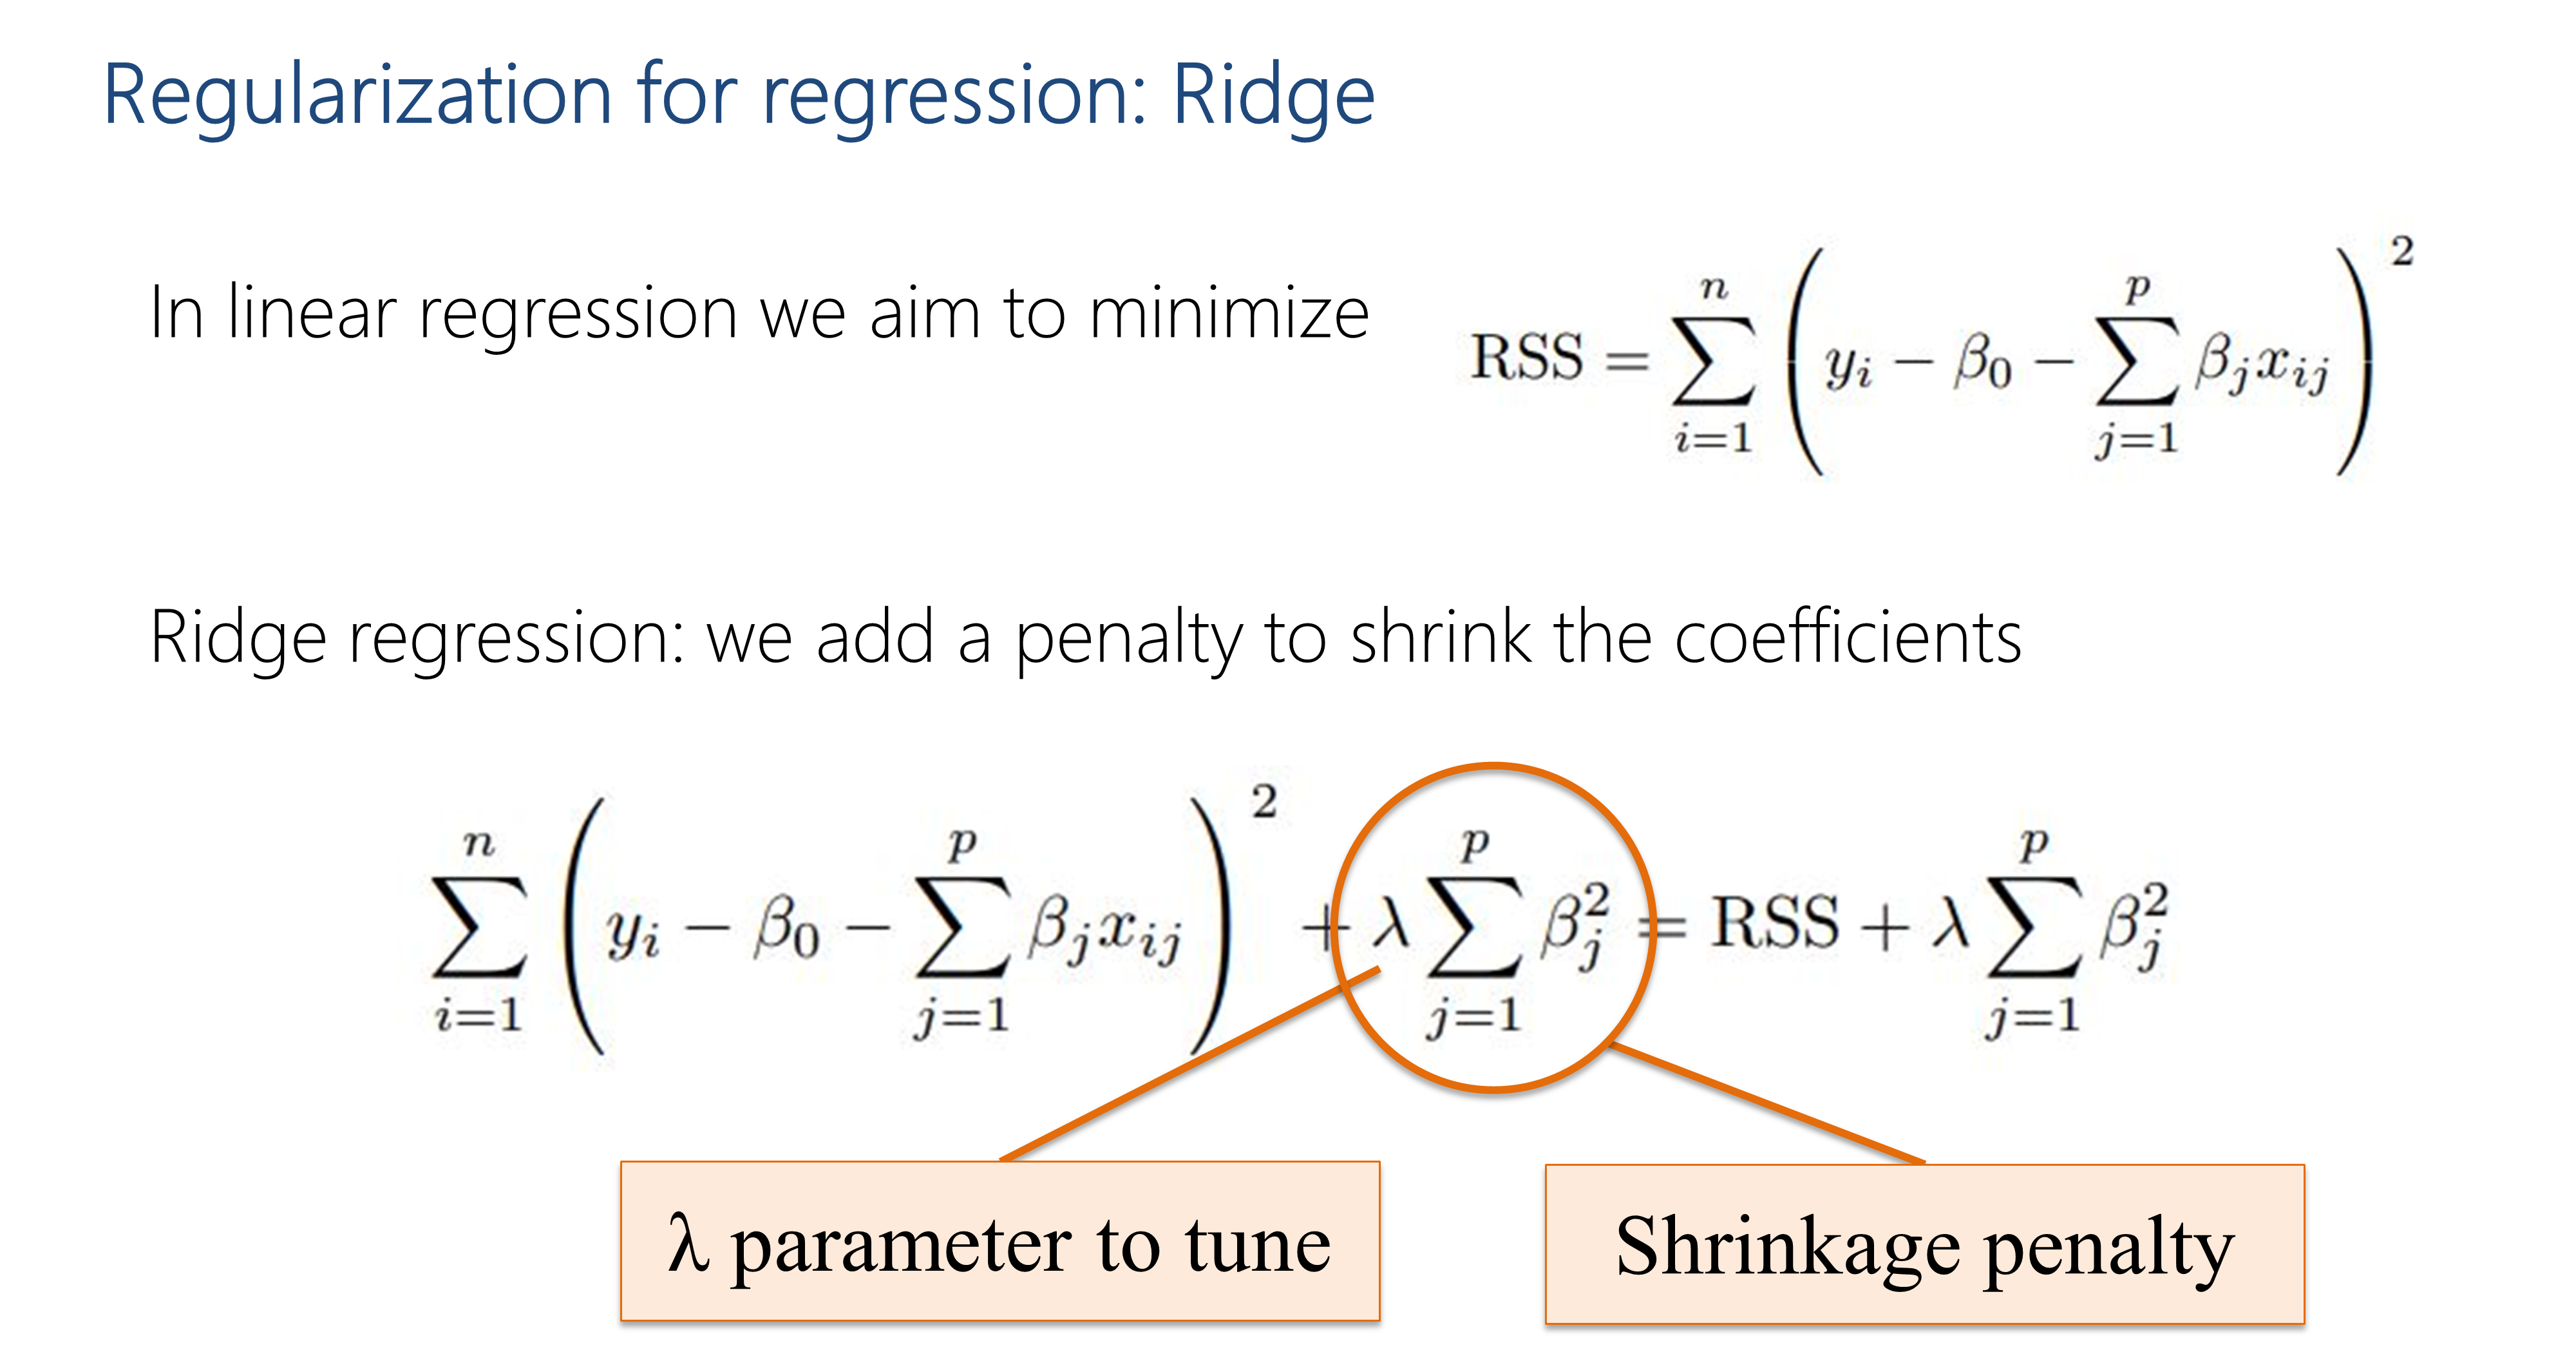

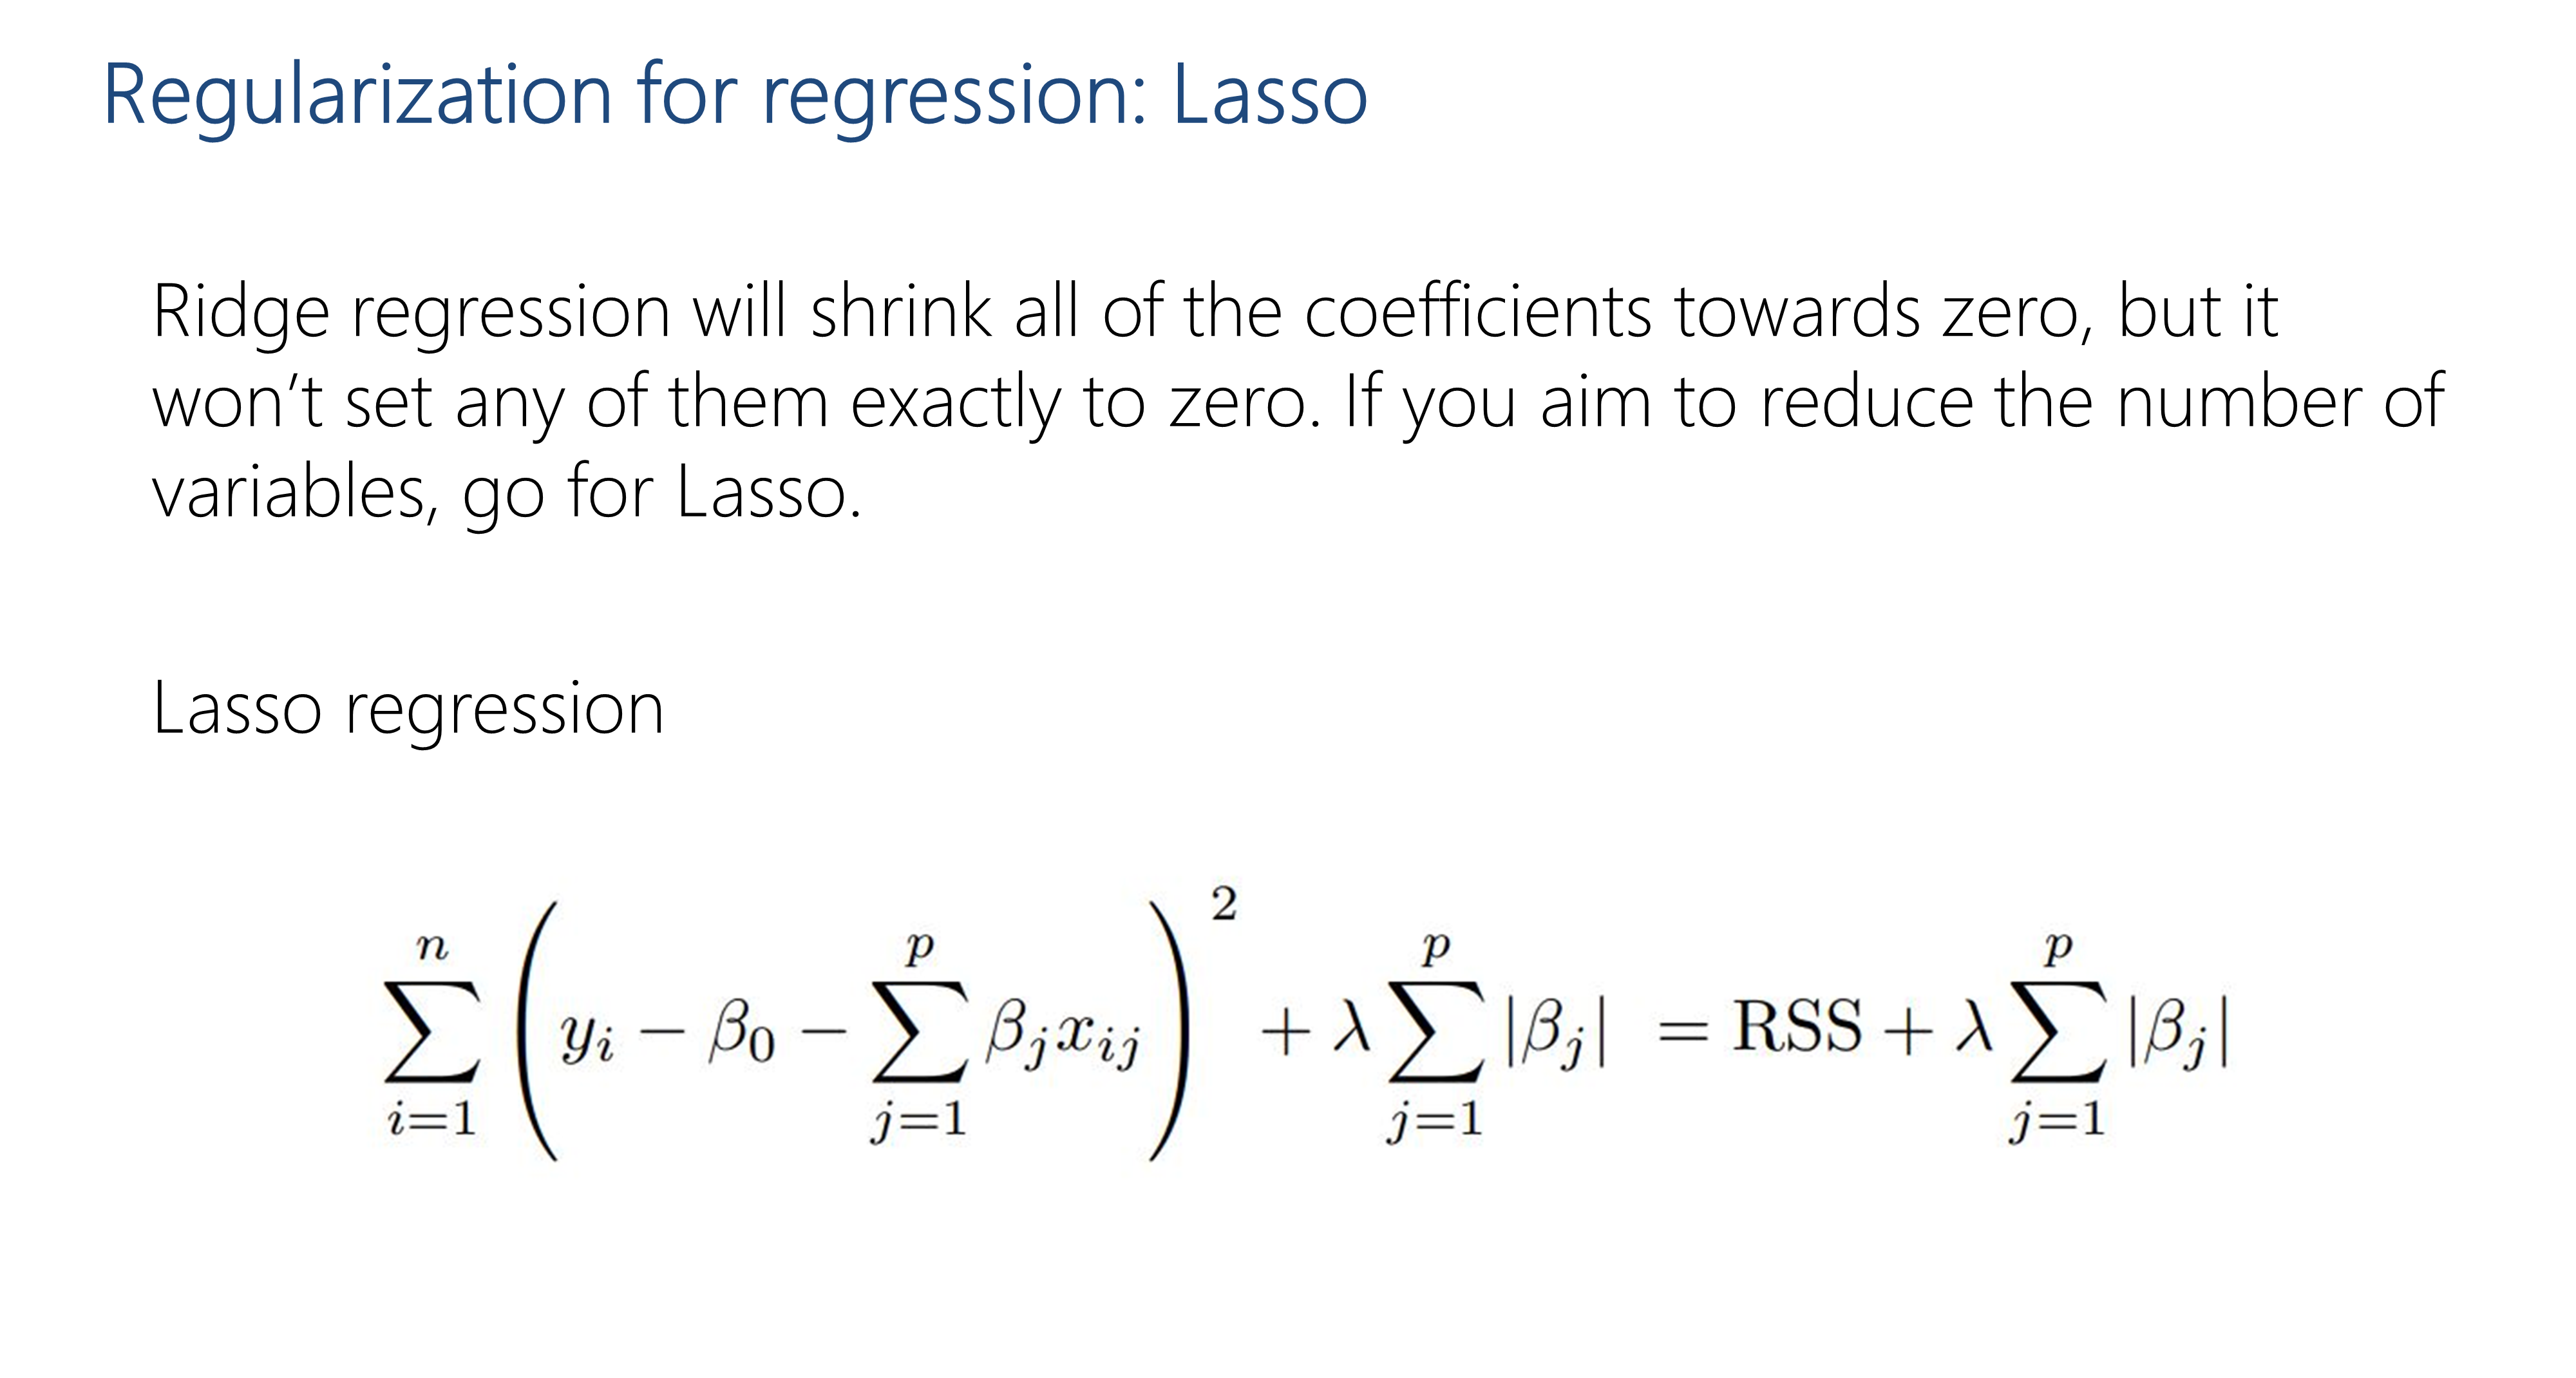

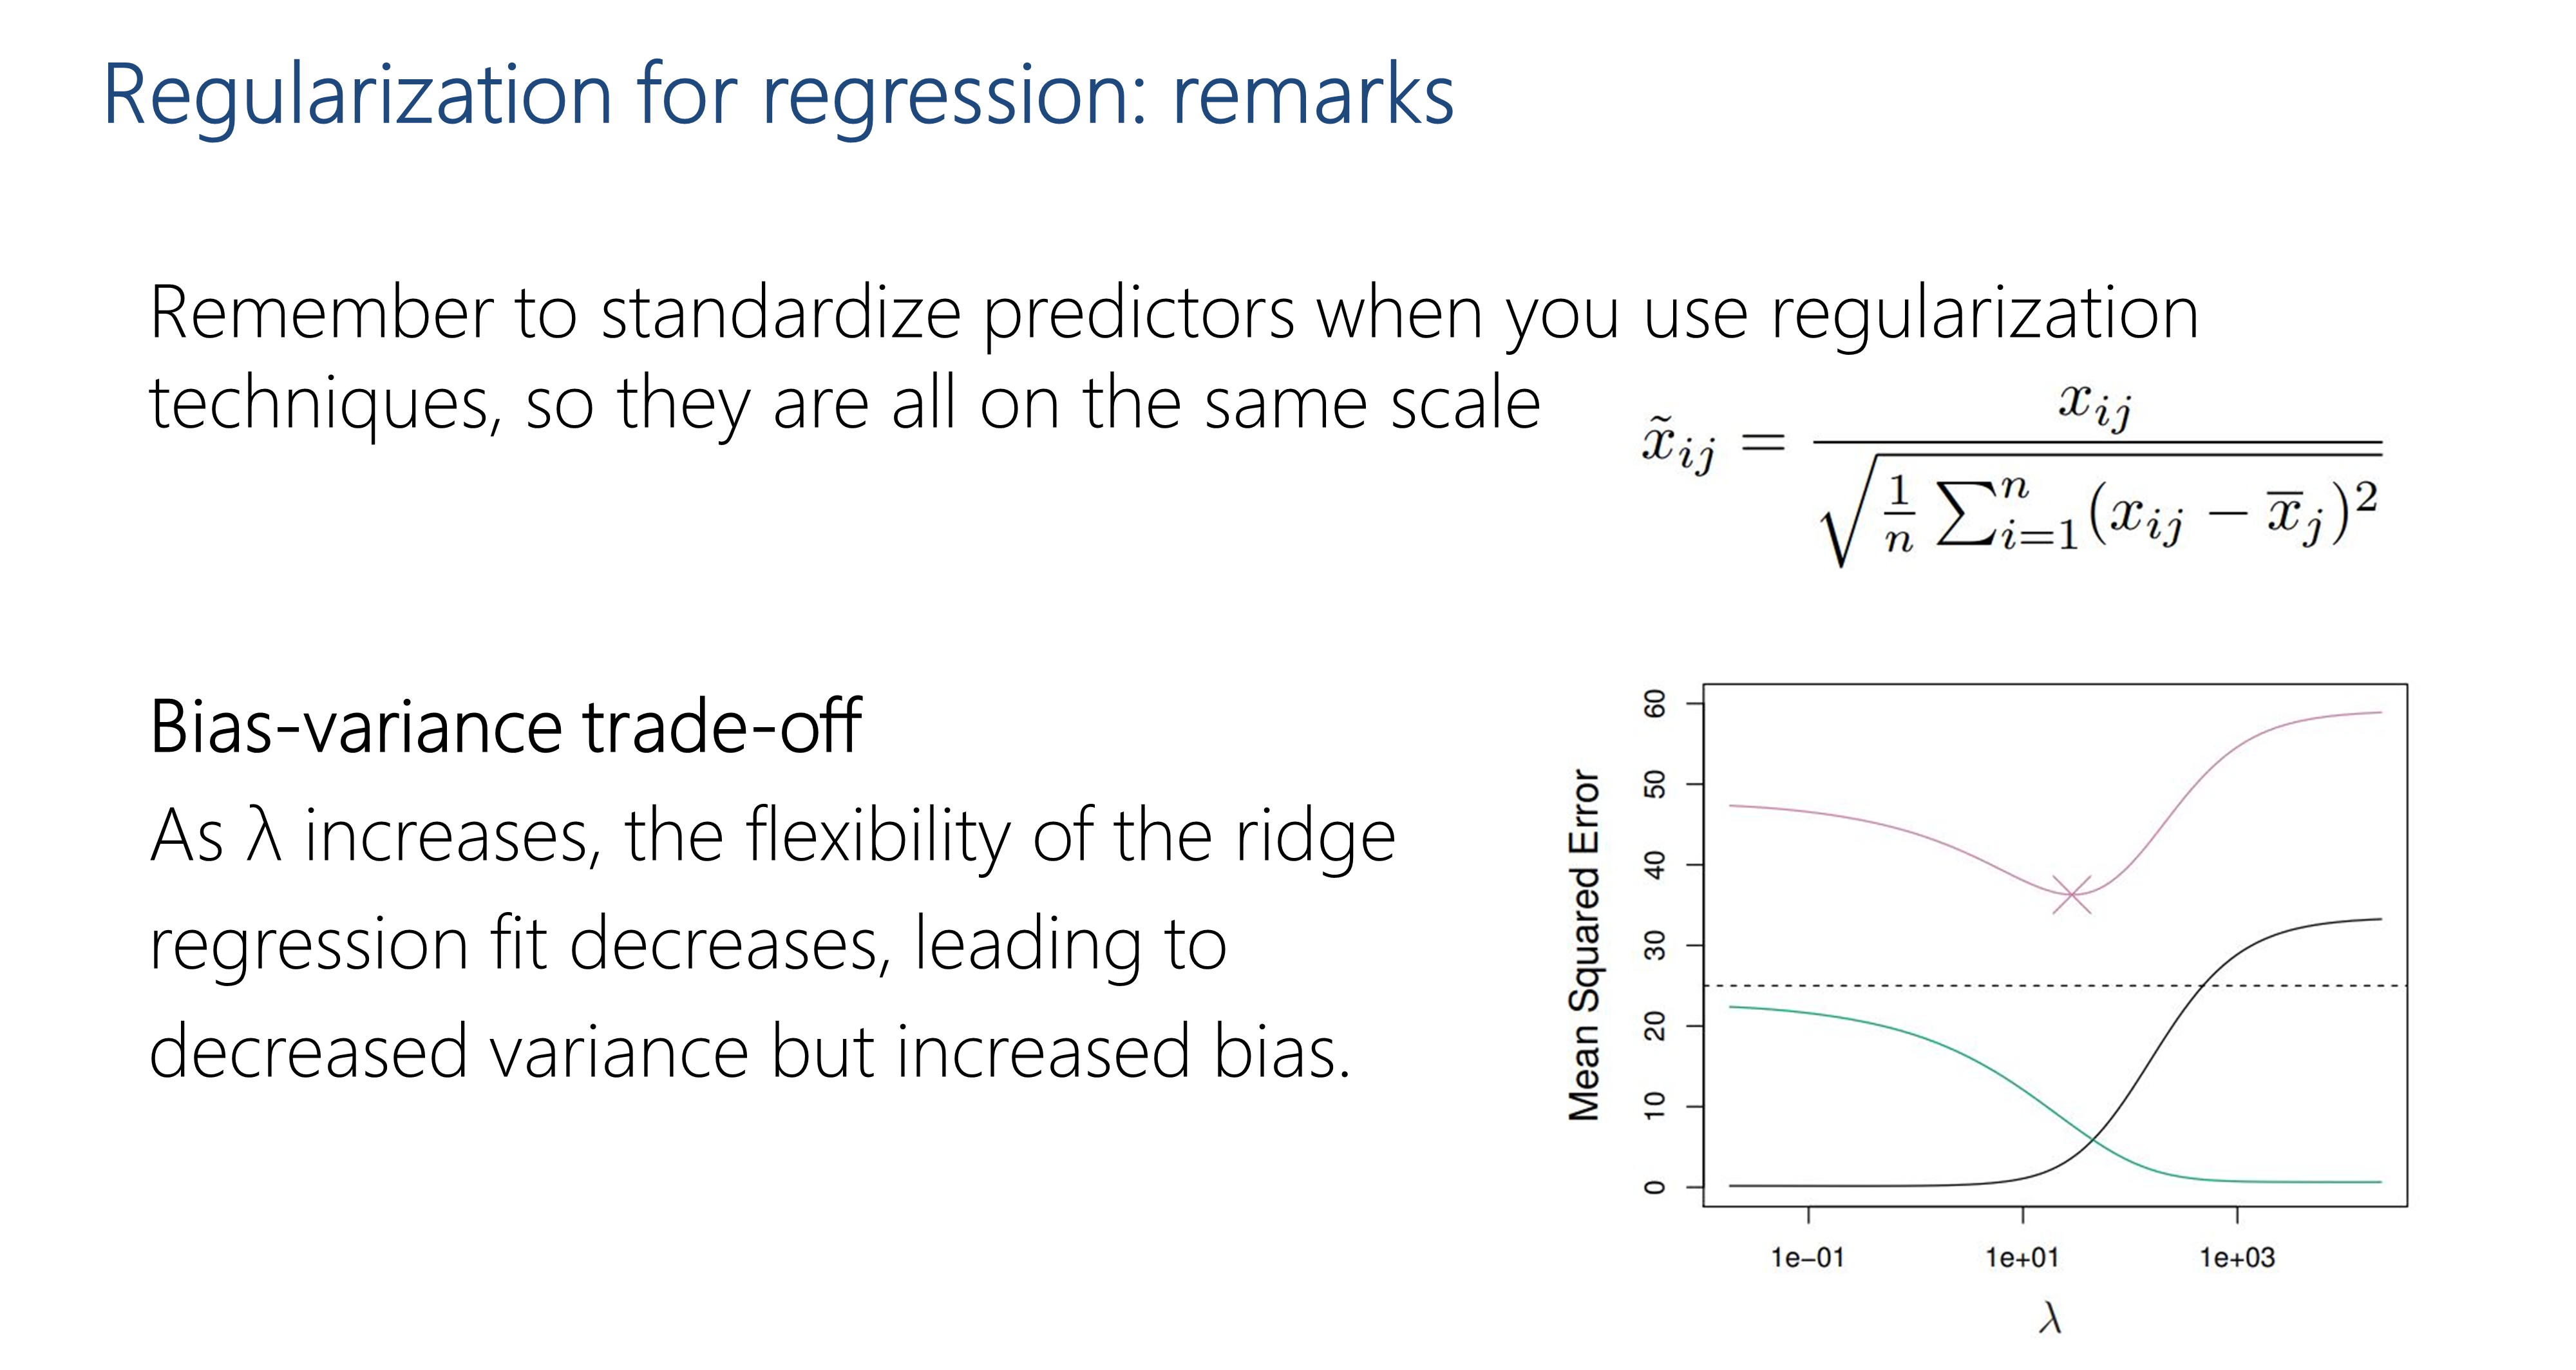

### Ridge or Lasso?
- Neither ridge regression nor the lasso will universally dominate the other
- Lasso performs usually better in a setting where a relatively small number of predictors have substantial coefficients, and the remaining predictors have coefficients that are very small or that equal zero
- Ridge regression will perform better when the response is a function of many predictors, all with coefficients of roughly equal size
- A technique such as cross-validation can be used in order to determine which approach is better on a particular data set

### How to select $\lambda$?
- Cross-validation provides a simple way to tackle this problem
- We choose a grid of $\lambda$ values, and compute the cross-validation error for each value of $\lambda$
- We then select the tuning parameter value for which the cross-validation error is smallest
- Finally, the model is re-fit using all of the available observations and the selected value of the tuning parameter

### Caveats on doing inference after regularization

Regularization techniques are mainly helpful in achieving better prediction performance. [Indeed, there are problems when performing inference after regularization.](https://stats.stackexchange.com/a/291641/253229)


### Regularization in scikit-learn
In **scikit-learn** there are the following functions:
- `sklearn.linear_model.Ridge`: [Ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)
- `sklearn.linear_model.Lasso`: [Lasso regression](https://scikit-learn.org/stable/modules/linear_model.html#lasso)
- [And many other regularization techniques that you can find here.](https://scikit-learn.org/stable/modules/linear_model.html#)

## Model Selection
To evaluate model performance, we usually split our dataset into train and test (hold-out method). **With small datasets:**
- The test error rate can be highly variable
- Very few data are used for training and the validation set error rate may tend to overestimate the test error rate

In the absence of a very large test set a number of techniques can be used to estimate the test error rate.

### Cross Validation

Machine learning is an iterative process. You will face choices about what predictive variables to use, what types of models to use, what arguments to supply to those models, etc. So far, you have made these choices in a data-driven way by measuring model quality with a validation (or holdout) set.  

But there are some drawbacks to this approach.  To see this, imagine you have a dataset with 500 rows.  You will typically keep about 20% of the data as a validation dataset, or 100 rows.  But this leaves some random chance in determining model scores.  That is, a model might do well on one set of 100 rows, even if it would be inaccurate on a different 100 rows.  

At an extreme, you could imagine having only 1 row of data in the validation set. If you compare alternative models, which one makes the best predictions on a single data point will be mostly a matter of luck!

In general, the larger the validation set, the less randomness (aka "noise") there is in our measure of model quality, and the more reliable it will be.  Unfortunately, we can only get a large validation set by removing rows from our training data, and smaller training datasets mean worse models!

### What is cross-validation?

In **cross-validation**, we run our modeling process on different subsets of the data to get multiple measures of model quality. 

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset.  In this case, we say that we have broken the data into 5 "**folds**".  

![tut5_crossval](https://i.imgur.com/9k60cVA.png)

Then, we run one experiment for each fold:
- In **Experiment 1**, we use the first fold as a validation (or holdout) set and everything else as training data. This gives us a measure of model quality based on a 20% holdout set.  
- In **Experiment 2**, we hold out data from the second fold (and use everything except the second fold for training the model). The holdout set is then used to get a second estimate of model quality.
- We repeat this process, using every fold once as the holdout set.  Putting this together, 100% of the data is used as holdout at some point, and we end up with a measure of model quality that is based on all of the rows in the dataset (even if we don't use all rows simultaneously).

### When should you use cross-validation?

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions.  However, it can take longer to run, because it estimates multiple models (one for each fold).  

So, given these tradeoffs, when should you use each approach?
- _For small datasets_, where extra computational burden isn't a big deal, you should run cross-validation.
- _For larger datasets_, a single validation set is sufficient.  Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

There's no simple threshold for what constitutes a large vs. small dataset.  But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.  

Alternatively, you can run cross-validation and see if the scores for each experiment seem close.  If each experiment yields the same results, a single validation set is probably sufficient.

### The `cross_val_score` method

In [113]:
from sklearn.model_selection import cross_val_score
cross_val_score?

The `sklearn` package provides the `cross_val_score` function to perform model evaluation. The function, given a dataset, automatically:
- splits it into different folds
- trains the model on the training folds
- evaluate the model on the validation folds
- return as a result the validation scores computed on each split

**With the `scoring` argument we can control which metric is applied each time to compute the validation scores.**

In the most general case, `scoring` is a **function** having the following signature:
```python
def scorer(model, X, y):
    #...
    return score

```

It can be made with the `make_scorer` sklearn function given a **metric**, i.e., a function with following signature:
```python
def metric(y_true, y_predict):
    #...
    return score

```

Note: in the following code, we will use the **Pipeline** object, which allows us to apply a sequence of transformations automatically.

Best degree:  3 
Val score:  0.9790383499536933
Test score: 0.9938856741363491


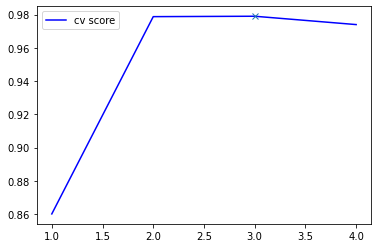

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


# NOTE: We don't need to explicitely train the model, the
# function will do it for us for each train split. Also
# train scores are not reported, only the cv score!
# ======================================================

# NOTE: The API always maximises the score, so score that
# must be minimized are retured as negative values!
r2_scorer = make_scorer(r2_score,
                        greater_is_better=True)
# or ...
# mse_scorer = 'neg_mean_squared_error'

degree = list(range(1,5))
val_scores = np.zeros(len(degree))
# Evaluation with cross-validation
for i, d in enumerate(degree):
    model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                      ('linear', LinearRegression(fit_intercept=True))])
    scores = cross_val_score(model, X_train, y_train, scoring=r2_scorer, cv=5)
    val_scores[i] = np.mean(scores)

# Identifies which is the best degree
best_model_idx = np.argmax(val_scores)
best_degree = degree[best_model_idx]
# And the corresponding (best) validation score
best_val_score = val_scores[best_model_idx]
print("Best degree: ", best_degree,
      "\nVal score: ", best_val_score)
    
    
# Train again the Pipeline using the best parameter and the whole training set
model = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

model = model.fit(np.concatenate([X_train]), np.concatenate([y_train]))
y_predict = model.predict(X_test)
test_score = r2_score(y_test, y_predict)

print("Test score:", test_score)

plt.plot(degree, val_scores, label="cv score", color="blue")
plt.plot([best_degree], [best_val_score], marker="x")
plt.legend()

[For more details about cross-validation in scikit-learn read here.](https://scikit-learn.org/stable/modules/cross_validation.html)

## Hypothesis Testing

Hypothesis testing in machine learning, also known as statistical hypothesis testing, is a **statistical technique used to make inferences** and draw conclusions about a population or data based on a sample of data. It is useful in machine learning for **various purposes**, including **assessing the significance of relationships, comparing models, and making decisions about data-driven hypotheses**.

Key Concepts in Hypothesis Testing:
- **Null Hypothesis ($H_0$)**: The null hypothesis is a statement that there is no effect or relationship in the data. It represents the status quo or a baseline assumption. Hypothesis testing aims to determine whether there is enough evidence to reject the null hypothesis in favor of an alternative hypothesis.
- **Alternative Hypothesis ($H_a$ or $H_1$)**: The alternative hypothesis is the statement that you want to test. It represents the possibility of an effect or relationship in the data.
- **Test Statistic**: A test statistic is a numerical value computed from the sample data that summarizes the evidence regarding the null hypothesis. The choice of the test statistic depends on the specific hypothesis test being used.
- **p-value**: The p-value is a measure of the strength of evidence against the null hypothesis. It quantifies the probability of observing the test statistic or a more extreme value when the null hypothesis is true. A smaller p-value suggests stronger evidence against the null hypothesis.
    
Let’s take the case of regression models: When we fit a straight line through a linear regression model, we get the slope and intercept for the line. Hypothesis testing is used to confirm if our beta coefficients are significant in a linear regression model.

The two most common tests are:
- **t-test**: the null hypothesis is that there is no relationship between response and the predictor variables. For all the predictor variables, individual hypothesis testing is done to determine whether the relationship between response and that particular predictor variable is statistically significant based on the sample data used for training the model. 
- **F-test**: The null hypothesis is that the linear regression model does not exist. This essentially means that the value of all the coefficients is equal to zero.